### Name: Chinedu Onyeka, Idongesit Nkanang, Eric George Mons
### Course: Data1202 - Data Analytics Tools

**Import required libraries**

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the file**

In [2]:
url = "https://raw.githubusercontent.com/chinedu2301/DC_Analytics/main/homeless.csv"
homeless = pd.read_csv(url)
homeless.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570,864,4887681
1,1,Pacific,Alaska,1434,582,735139
2,2,Mountain,Arizona,7259,2606,7158024
3,3,West South Central,Arkansas,2280,432,3009733
4,4,Pacific,California,109008,20964,39461588


In [3]:
# Drop the unnamed column
homeless = homeless.drop(['Unnamed: 0'], axis = 1)


In [4]:
# check the head of the new dataframe
homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [5]:
# check the info and data type of the variables
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          51 non-null     object
 1   state           51 non-null     object
 2   individuals     51 non-null     int64 
 3   family_members  51 non-null     int64 
 4   state_pop       51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
# descriptive statistics 
homeless.describe().T

,count,mean,std,min,25%,50%,75%,max
individuals,51.0,7.225784e+03,1.599103e+04,434.0,1446.5,3082.0,6781.5,109008.0
family_members,51.0,3.504882e+03,7.805412e+03,75.0,592.0,1482.0,3196.0,52070.0
state_pop,51.0,6.405637e+06,7.327258e+06,577601.0,1777413.5,4461153.0,7340946.5,39461588.0


In [7]:
# descriptive statistics - include all variables
homeless.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,51,9,South Atlantic,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,51,51,Alabama,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
individuals,51.0,NaN,NaN,NaN,7225.784314,15991.025083,434.0,1446.5,3082.0,6781.5,109008.0
family_members,51.0,NaN,NaN,NaN,3504.882353,7805.411811,75.0,592.0,1482.0,3196.0,52070.0
state_pop,51.0,NaN,NaN,NaN,6405637.27451,7327257.808679,577601.0,1777413.5,4461153.0,7340946.5,39461588.0


In [8]:
# check for missing values
homeless.isnull().sum()

region            0
state             0
individuals       0
family_members    0
state_pop         0
dtype: int64

In [9]:
# create correlation matrix
homeless_corr = homeless.corr()
homeless_corr

,individuals,family_members,state_pop
individuals,1.000000,0.631426,0.834960
family_members,0.631426,1.000000,0.589913
state_pop,0.834960,0.589913,1.000000


<AxesSubplot:>

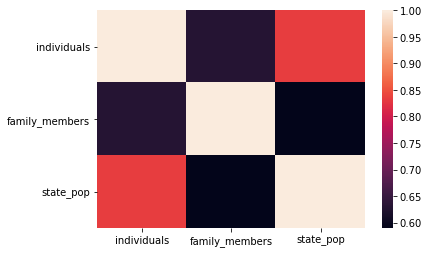

In [10]:
# plot a heat map of the correlation matrix
sns.heatmap(homeless_corr)

In [11]:
# check for the unique regions
homeless['region'].unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Mid-Atlantic'], dtype=object)

In [12]:
# check the number of unique regions
homeless['region'].unique()

9

In [13]:
# check for unique states
homeless['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
# check for number of unique states
homeless['state'].nunique()

51

In [15]:
# check for duplicates
homeless.duplicated().sum()

0

*From the above, we see that there are zero duplicates*

**Group by Region**

In [16]:
# group the data by region
homeless_region = homeless.groupby('region').sum()
homeless_region

,individuals,family_members,state_pop
region,,,
East North Central,25406,14002,46886387
East South Central,12468,3889,19101485
Mid-Atlantic,54038,60769,41217298
Mountain,28491,9258,24511745
New England,12903,17499,14829322
Pacific,142136,33162,53323075
South Atlantic,52260,23818,65229624
West North Central,13971,8242,21350241
West South Central,26842,8110,40238324


**Group by State**

In [17]:
# group the data by state
homeless_state = homeless.groupby('state').sum()
homeless_state

,individuals,family_members,state_pop
state,,,
Alabama,2570,864,4887681
Alaska,1434,582,735139
Arizona,7259,2606,7158024
Arkansas,2280,432,3009733
California,109008,20964,39461588
Colorado,7607,3250,5691287
Connecticut,2280,1696,3571520
Delaware,708,374,965479
District of Columbia,3770,3134,701547


### Insights

**Exploratory data analysis**

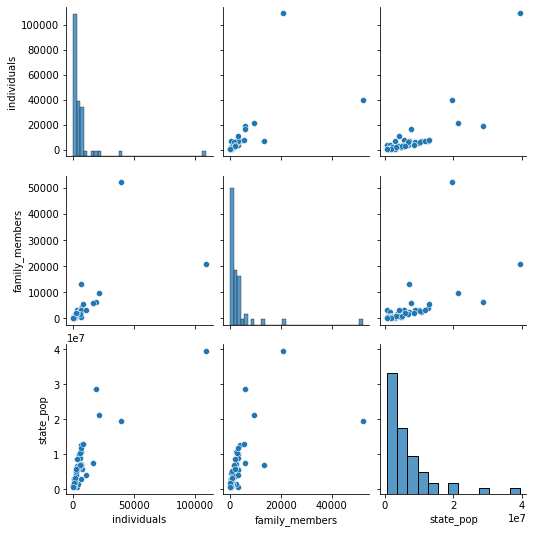

In [18]:
# pairplot of the homeless data
sns.pairplot(data = homeless)

**Insights - Region wide**

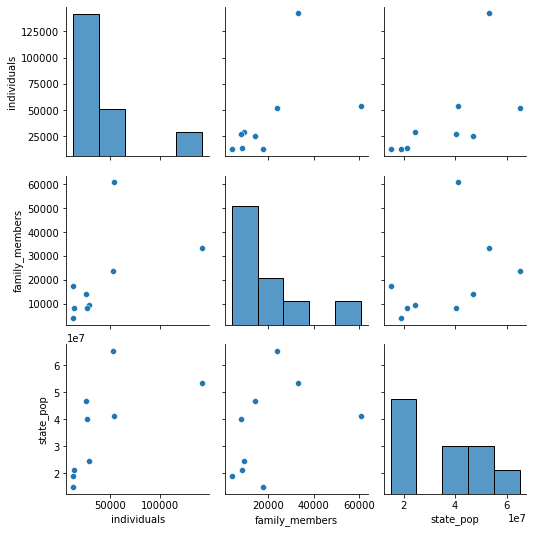

In [19]:
# pairplot of the homeless_region data - data grouped by region
sns.pairplot(data = homeless_region)

In [20]:
# find region with highest homeless people

# first create a column containing total homeless
homeless_region['total_homeless'] = homeless_region['individuals'] + homeless_region['family_members'] 

# add another column for total_homeless/state_pop - total homeless per population
homeless_region['homeless_prop'] = (homeless_region['total_homeless']/homeless_region['state_pop']) * 100

# check the new dataframe
homeless_region

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
East North Central,25406,14002,46886387,39408,0.084050
East South Central,12468,3889,19101485,16357,0.085632
Mid-Atlantic,54038,60769,41217298,114807,0.278541
Mountain,28491,9258,24511745,37749,0.154004
New England,12903,17499,14829322,30402,0.205013
Pacific,142136,33162,53323075,175298,0.328747
South Atlantic,52260,23818,65229624,76078,0.116631
West North Central,13971,8242,21350241,22213,0.104041
West South Central,26842,8110,40238324,34952,0.086862


In [21]:
# get the region with the maximum homeless people
homeless_region[homeless_region["total_homeless"] == homeless_region["total_homeless"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
Pacific,142136,33162,53323075,175298,0.328747


In [22]:
# get the region with the minimum homeless people
homeless_region[homeless_region["total_homeless"] == homeless_region["total_homeless"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
East South Central,12468,3889,19101485,16357,0.085632


In [23]:
# get the region with the maximum population
homeless_region[homeless_region["state_pop"] == homeless_region["state_pop"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
South Atlantic,52260,23818,65229624,76078,0.116631


In [24]:
# get the region with the minimum population
homeless_region[homeless_region["state_pop"] == homeless_region["state_pop"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
New England,12903,17499,14829322,30402,0.205013


In [25]:
# get the region with the minimum homeless proportion
homeless_region[homeless_region["homeless_prop"] == homeless_region["homeless_prop"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
East North Central,25406,14002,46886387,39408,0.08405


In [26]:
# get the region with the maximum homeless proportion
homeless_region[homeless_region["homeless_prop"] == homeless_region["homeless_prop"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
region,,,,,
Pacific,142136,33162,53323075,175298,0.328747


#### Exploratory Data Analysis - Region wide

In [27]:
homeless_region_reset = homeless_region.reset_index() # reset index


In [28]:
homeless_region_total_homeless = homeless_region_reset.sort_values('total_homeless', ascending = False) # sort values

[Text(0.5, 1.0, 'Bar graph of total homeless by region'), Text(0.5, 0, ' ')]

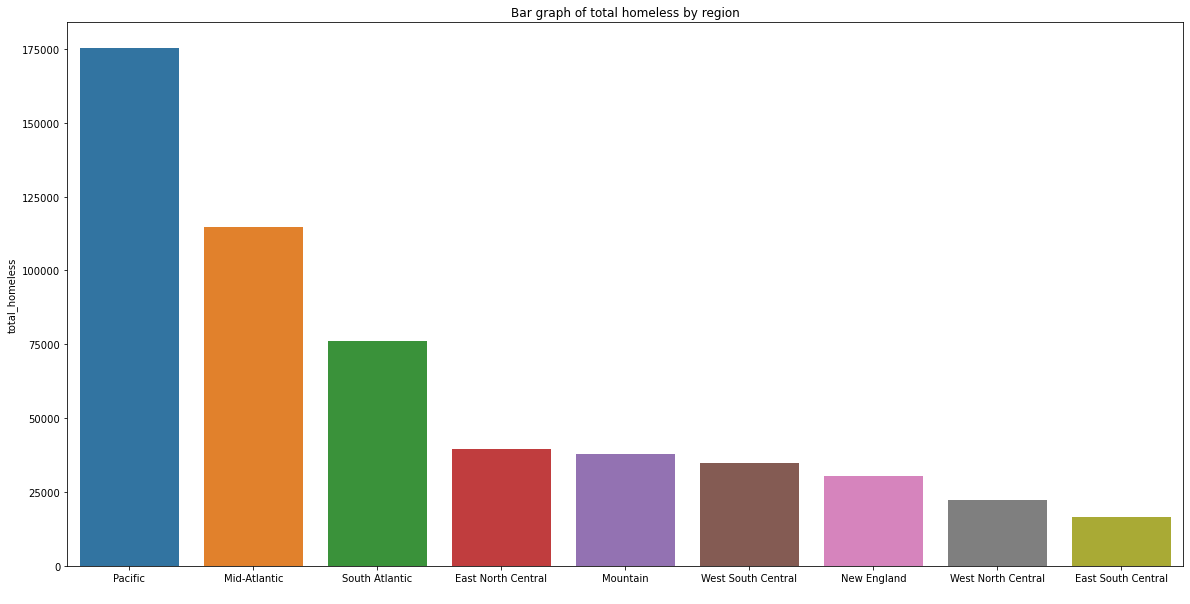

In [29]:
# sort values by total_homeless
homeless_region_total_homeless = homeless_region_reset.sort_values('total_homeless', ascending = False)
# plot bar graph
plt.figure(figsize = (20, 10))
bar_region = sns.barplot(x = 'region', y = 'total_homeless', data = homeless_region_total_homeless)
bar_region
bar_region.set(title = "Bar graph of total homeless by region", xlabel = " ")

The pacific region has the highest number of total homeless while the East South Central has the lowest total number of homeless

[Text(0.5, 1.0, 'Bar graph of homeless proportion by region'),
 Text(0.5, 0, ' ')]

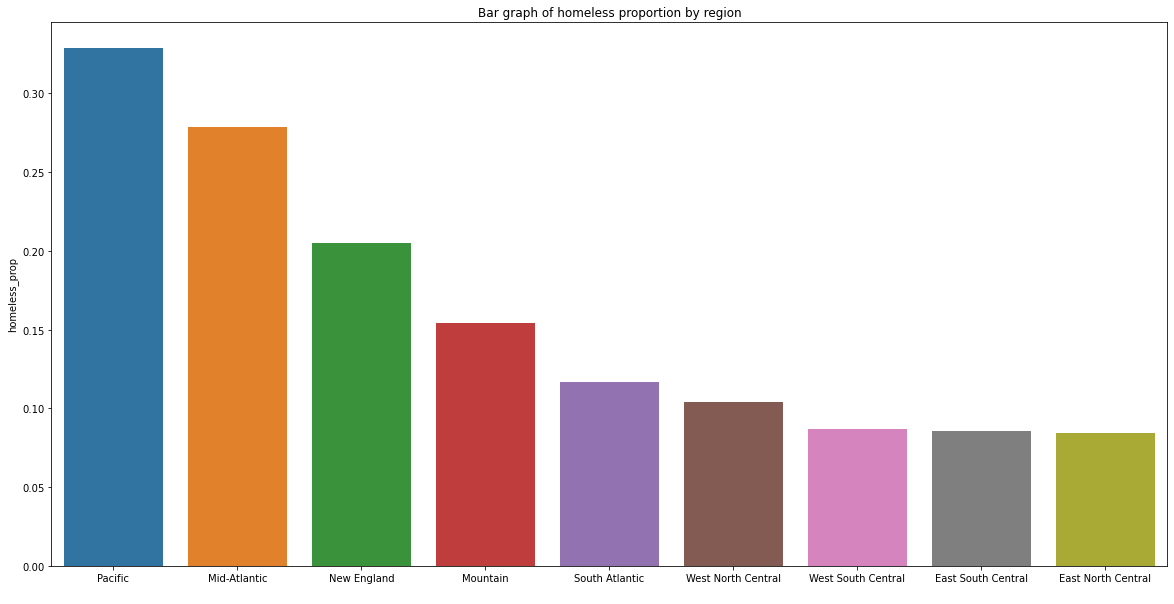

In [30]:
# sort values by homeless_proportion
homeless_region_homeless_prop = homeless_region_reset.sort_values('homeless_prop', ascending = False)

# plot bar graph

plt.figure(figsize = (20, 10))
bar_homeless_prop = sns.barplot(x = 'region', y = 'homeless_prop', data = homeless_region_homeless_prop)
bar_homeless_prop
bar_homeless_prop.set(title = "Bar graph of homeless proportion by region", xlabel = " ")

The pacific region also has the highest number of total homeless proportion whereas the East North Central has the lowest total number of homeless proportion.

**Insights - State wide**

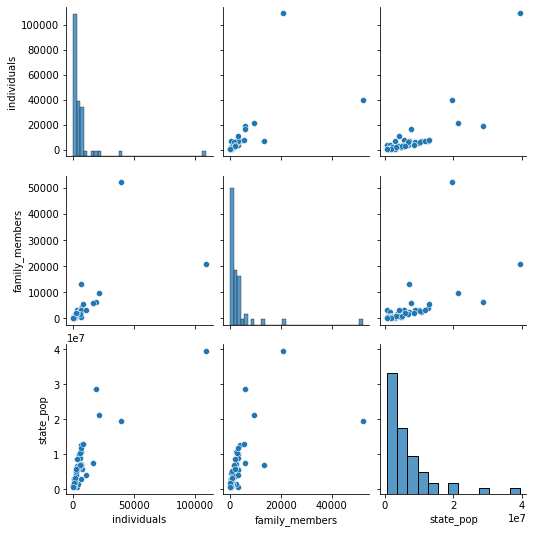

In [31]:
# pairplot of the homeless_state data - data grouped by state
sns.pairplot(data = homeless_state)

In [32]:
homeless_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   individuals     51 non-null     int64
 1   family_members  51 non-null     int64
 2   state_pop       51 non-null     int64
dtypes: int64(3)
memory usage: 1.6+ KB


In [33]:
# find state with highest homeless people

# first create a column containing total homeless
homeless_state['total_homeless'] = homeless_state['individuals'] + homeless_state['family_members'] 

# add another column for total_homeless/state_pop - total homeless per population
homeless_state['homeless_prop'] = (homeless_state['total_homeless']/homeless_state['state_pop']) * 100

# check the new dataframe
homeless_state

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
Alabama,2570,864,4887681,3434,0.070258
Alaska,1434,582,735139,2016,0.274234
Arizona,7259,2606,7158024,9865,0.137817
Arkansas,2280,432,3009733,2712,0.090108
California,109008,20964,39461588,129972,0.329363
Colorado,7607,3250,5691287,10857,0.190765
Connecticut,2280,1696,3571520,3976,0.111325
Delaware,708,374,965479,1082,0.112069
District of Columbia,3770,3134,701547,6904,0.984111


In [34]:
# get the state with the maximum homeless people
homeless_state[homeless_state["total_homeless"] == homeless_state["total_homeless"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
California,109008,20964,39461588,129972,0.329363


In [35]:
# get the state with the minimum homeless people
homeless_state[homeless_state["total_homeless"] == homeless_state["total_homeless"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
North Dakota,467,75,758080,542,0.071496


In [36]:
# get the state with the maximum population
homeless_state[homeless_state["state_pop"] == homeless_state["state_pop"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
California,109008,20964,39461588,129972,0.329363


In [37]:
# get the state with the minimum population
homeless_state[homeless_state["state_pop"] == homeless_state["state_pop"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
Wyoming,434,205,577601,639,0.11063


In [38]:
# get the state with the minimum homeless proportion
homeless_state[homeless_state["homeless_prop"] == homeless_state["homeless_prop"].min()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
Mississippi,1024,328,2981020,1352,0.045354


In [39]:
# get the state with the maximum homeless proportion
homeless_state[homeless_state["homeless_prop"] == homeless_state["homeless_prop"].max()]

,individuals,family_members,state_pop,total_homeless,homeless_prop
state,,,,,
District of Columbia,3770,3134,701547,6904,0.984111


#### Exploratory Data Analysis - State wide

In [40]:
homeless_state_reset = homeless_state.reset_index() # reset index


In [41]:
# Sort by highest number of homelessness
homeless_state_total_homeless = homeless_state_reset.sort_values('total_homeless', ascending = False)
homeless_state_total_homeless.head()

,state,individuals,family_members,state_pop,total_homeless,homeless_prop
4,California,109008,20964,39461588,129972,0.329363
32,New York,39827,52070,19530351,91897,0.470534
9,Florida,21443,9587,21244317,31030,0.146063
43,Texas,19199,6111,28628666,25310,0.088408
47,Washington,16424,5880,7523869,22304,0.296443


[Text(0.5, 1.0, 'Bar graph of total homeless by state'), Text(0.5, 0, ' ')]

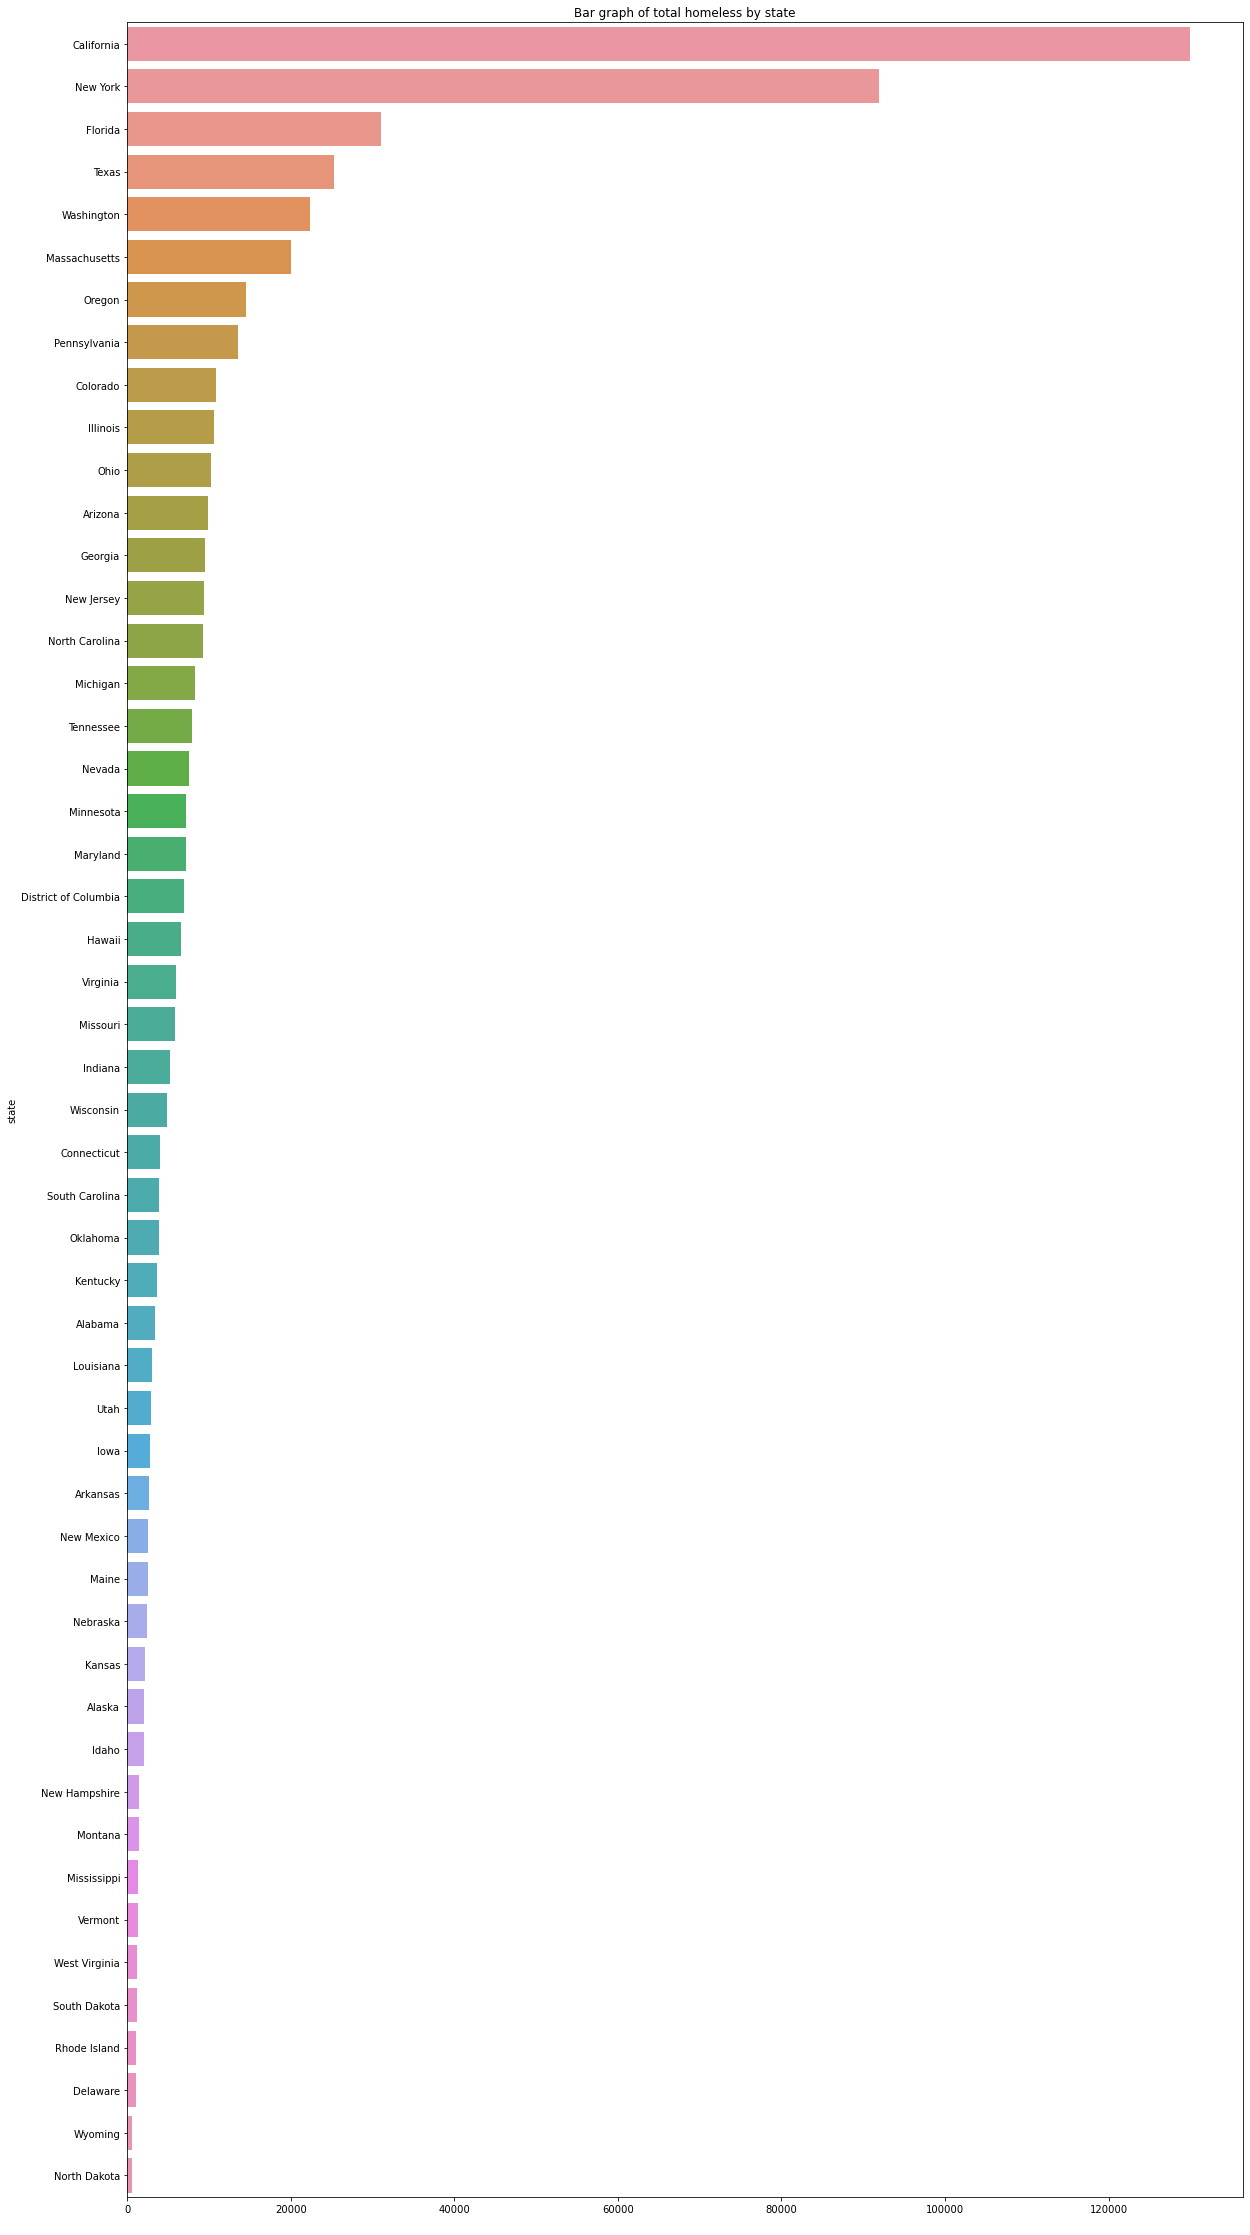

In [42]:
# plot bar graph for highest number of homelessness
plt.figure(figsize = (20, 40))
bar_state = sns.barplot(y = 'state', x = 'total_homeless', data = homeless_state_total_homeless)
bar_state
bar_state.set(title = "Bar graph of total homeless by state", xlabel = " ")

[Text(0.5, 1.0, 'Bar graph of homeless proportion by state'),
 Text(0.5, 0, ' ')]

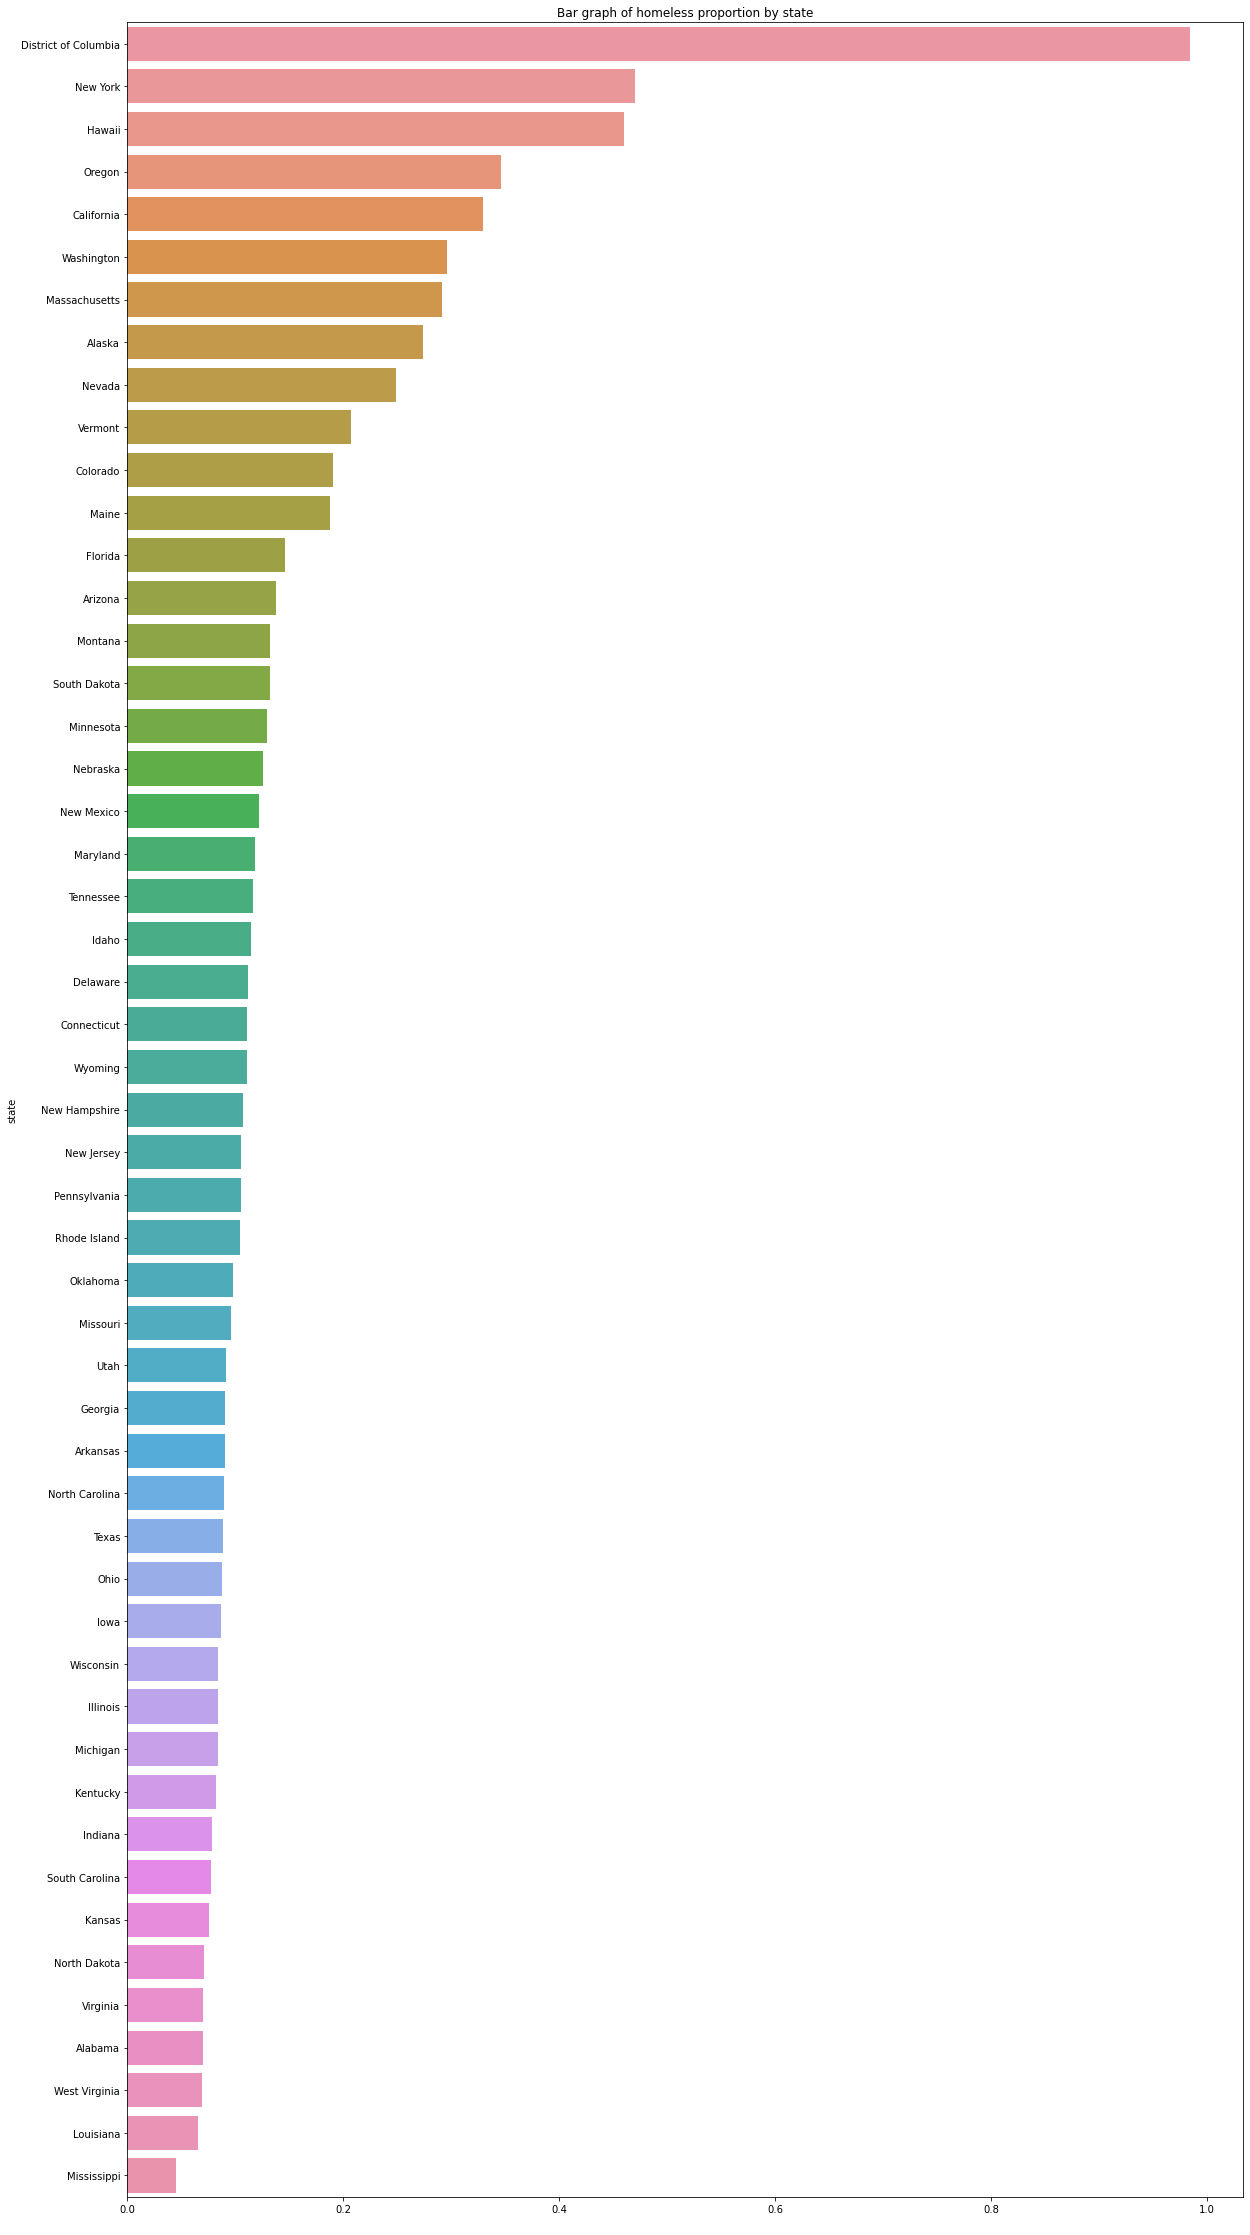

In [43]:
# sort values by homeless_proportion
homeless_state_homeless_prop = homeless_state_reset.sort_values('homeless_prop', ascending = False)

# plot bar graph

plt.figure(figsize = (20, 40))
bar_homeless_prop_state = sns.barplot(y = 'state', x = 'homeless_prop', data = homeless_state_homeless_prop)

bar_homeless_prop_state.set(title = "Bar graph of homeless proportion by state", xlabel = " ")